<a href="https://colab.research.google.com/github/Muhafazah94/UASRANDOMFORESTCLASSIFICATION/blob/main/Random_Forest_Muhafazah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd #Python Data Analysis Library 
import numpy as np #Python Scientific Library (Umumnya membantu 
#dalam urusan list)
 
#Selective import modul-modul Scikit Learn 
#(Scikit Learn memiliki banyak modul machine learning)
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
new_names = ['sepal_length','sepal_width','petal_length','petal_width','iris_class']
dataset = pd.read_csv(url, names=new_names, skiprows=0, delimiter=',')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   iris_class    150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
dataset.head(6)
 #change head with sample and tail.

,sepal_length,sepal_width,petal_length,petal_width,iris_class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa


In [ ]:
dataset.groupby('iris_class').count()

,sepal_length,sepal_width,petal_length,petal_width
iris_class,,,,
Iris-setosa,50,50,50,50
Iris-versicolor,50,50,50,50
Iris-virginica,50,50,50,50


In [ ]:
y = dataset['iris_class']
x = dataset.drop(['iris_class'], axis=1)

print ("dataset : ",dataset.shape)
print ("x : ",x.shape)
print ("y : ",y.shape)

dataset :  (150, 5)
x :  (150, 4)
y :  (150,)


In [ ]:
#one hot encoding
y=pd.get_dummies(y)
y.sample(7)

,Iris-setosa,Iris-versicolor,Iris-virginica
17,1,0,0
131,0,0,1
18,1,0,0
143,0,0,1
107,0,0,1
140,0,0,1
92,0,1,0


In [ ]:
# Generate Training and Validation Sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3) #0.3 data sebagai data test

#converting to float 32bit
x_train = np.array(x_train).astype(np.float32)
x_test  = np.array(x_test).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
y_test  = np.array(y_test).astype(np.float32)

#print data split for validation
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(105, 4) (105, 3)
(45, 4) (45, 3)


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
print(pca.explained_variance_ratio_)
print(pca.singular_values_)
print(pca.components_)

[0.92461621 0.05301557 0.01718514 0.00518309]
[25.08986398  6.00785254  3.42053538  1.87850234]
[[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [ 0.65653988  0.72971237 -0.1757674  -0.07470647]
 [-0.58099728  0.59641809  0.07252408  0.54906091]
 [ 0.31725455 -0.32409435 -0.47971899  0.75112056]]


In [ ]:
# K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

Model = KNeighborsClassifier(n_neighbors=7) #Inisialisasi model Machine Learning yang digunakan.
Model.fit(x_train, y_train) #Proses training hanya 1 baris ini saja.
y_pred = Model.predict(x_test)

print(classification_report(y_test, y_pred))  # Mencetak Summary 
print(confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))) # Mencetak Conf Matrix
print('accuracy is',accuracy_score(y_pred,y_test)) # Mencetak Accuracy score


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.83      1.00      0.91        15
           2       1.00      0.77      0.87        13

   micro avg       0.93      0.93      0.93        45
   macro avg       0.94      0.92      0.93        45
weighted avg       0.94      0.93      0.93        45
 samples avg       0.93      0.93      0.93        45

[[17  0  0]
 [ 0 15  0]
 [ 0  3 10]]
accuracy is 0.9333333333333333


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
Model = MLPClassifier(hidden_layer_sizes=(10,5),  
                      max_iter=200, 
                      alpha=0.01, 
                      solver='sgd', verbose=1,  
                      random_state=121) 
h=Model.fit(x_train,y_train)
y_pred=Model.predict(x_test)

print(classification_report(y_test,y_pred)) # Mencetak Summary 

print(confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))) # Mencetak Confusion Matrix 

print('accuracy is ',accuracy_score(y_pred,y_test)) #Accuracy Score

Iteration 1, loss = 2.55470845
Iteration 2, loss = 2.51253403
Iteration 3, loss = 2.45817295
Iteration 4, loss = 2.39557008
Iteration 5, loss = 2.33171477
Iteration 6, loss = 2.26922699
Iteration 7, loss = 2.20972129
Iteration 8, loss = 2.15441144
Iteration 9, loss = 2.10420130
Iteration 10, loss = 2.05993156
Iteration 11, loss = 2.02153417
Iteration 12, loss = 1.98915905
Iteration 13, loss = 1.96273156
Iteration 14, loss = 1.94143117
Iteration 15, loss = 1.92463557
Iteration 16, loss = 1.91235606
Iteration 17, loss = 1.90371090
Iteration 18, loss = 1.89785512
Iteration 19, loss = 1.89334433
Iteration 20, loss = 1.89022097
Iteration 21, loss = 1.88769634
Iteration 22, loss = 1.88511827
Iteration 23, loss = 1.88222436
Iteration 24, loss = 1.87907434
Iteration 25, loss = 1.87555862
Iteration 26, loss = 1.87164569
Iteration 27, loss = 1.86741965
Iteration 28, loss = 1.86297005
Iteration 29, loss = 1.85835948
Iteration 30, loss = 1.85363949
Iteration 31, loss = 1.84890289
Iteration 32, los

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


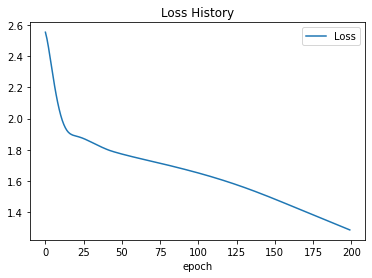

In [ ]:
import matplotlib.pyplot as plt

plt.plot(h.loss_curve_)
plt.title('Loss History')
plt.xlabel('epoch')
plt.legend(['Loss'])